In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')/255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')/255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2)
datagen.fit(X_train)


In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model = Sequential()
model.add(Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16))
model.add(Dense(units=10, activation='softmax'))
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.6681 - loss: 1.0237 - val_accuracy: 0.9470 - val_loss: 0.1748
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9034 - loss: 0.3214 - val_accuracy: 0.9637 - val_loss: 0.1158
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9200 - loss: 0.2739 - val_accuracy: 0.9699 - val_loss: 0.0967
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9258 - loss: 0.2442 - val_accuracy: 0.9676 - val_loss: 0.1069
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9287 - loss: 0.2368 - val_accuracy: 0.9704 - val_loss: 0.0943
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9322 - loss: 0.2287 - val_accuracy: 0.9699 - val_loss: 0.0957
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9334 - loss: 0.2216 - val_accuracy: 0.9702 - val_loss: 0.0913
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9347 - loss: 0.21

In [15]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9551 - loss: 0.1517
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9560 - loss: 0.1435
Train accuracy: 0.9556000232696533
Test accuracy: 0.960099995136261


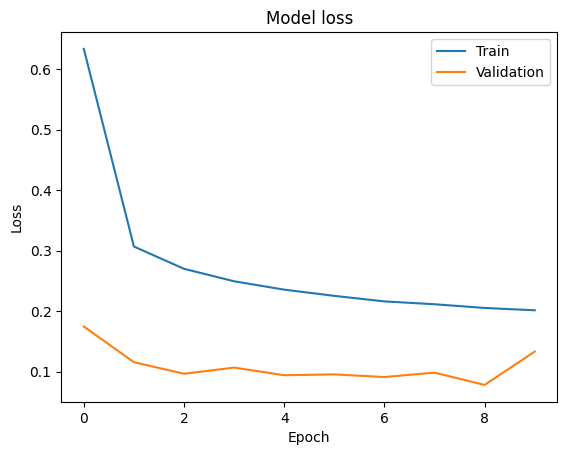

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')